# Stanford Car Dataset: Vehicle Classification

In recent years the role of Automotive E-Commerce has increased significantly. It is estimated that more than 1 million vehicles are sold online each year. However, along with the increase in market share, there has been a sharp increase in fraud posts. In the United Kingdom, in 2020, there were more than 70,000 reported cases of fraud posts, with victims losing an estimated $80million (Murray, 2020). Usually, such posts contain inconsistencies, e.g., the images they upload do not correspond to the car information.

Using advanced machine learning techniques appropriate for image recognition, we can help solve the challenge mentioned above.

Goal: This project aims to build a model that classifies a car's make and model given an image.

## Dataset

We will be using The Stanford Cars Dataset, an extensive collection of vehicle images. It consists of 16,185 total images labeled with 196 classes based on the car’s Make/Model/Year (e.g., Mercedes C class 2009). The data is split into 8,144 training images and 8,041 testing images (roughly 50-50% train-test split), so each class of car has around 40 images in the training set and the same amount in the testing set as well.

**Importing necessary libraries**

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D,Dropout
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.optimizers import Adam

In [3]:
print("version:  ",tf.__version__)
print("hub version:  ",hub.__version__)

print("GPU","available YESSS!!!" if tf.config.list_physical_devices("GPU") else "not available")

version:   2.15.0
hub version:   0.16.1
GPU not available


In [4]:
## loading the data
train_car = glob("/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/*/*")
test_car = glob("/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/test/*/*")

In [5]:
print(len(train_car))
print(len(test_car))

8144
8041


In [6]:
train_car[:10]

['/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/06584.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/05532.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/06446.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/04574.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/06337.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/00541.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/00068.jpg',
 '/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train/GMC Canyon Extended Cab 2012/05704.jpg',
 '/kaggle/input/stanford-car-dataset-by-

## Data Exploration
The functions below extract make, model and the year of the car and plots its image for both training and testing set.

Next, we will create a dataframe which contains 3 columns:

* Cars: Contains all the information about each car (Make/Model/Year).
* Make: Just gives the make of the car.
* Year: gives the production year of a given car.


Furthermore, I create a couple of barplots for the make and year columns. Based on those plots, we can see how the data is distributed. E.g. which make of the car has most images in the dataset.

**Feature Engineering on the dataset:**

In [7]:
def get_car_class(car):

    '''
    This function will return the car label/class per given image
    '''
    car_class = car.replace("/","")[70::][:-9]
    return car_class


def get_test_car_class(car):
    '''
    This function will return the car label/class per given image
    '''
    car_class = car.replace("/","")[69::][:-9]
    return car_class

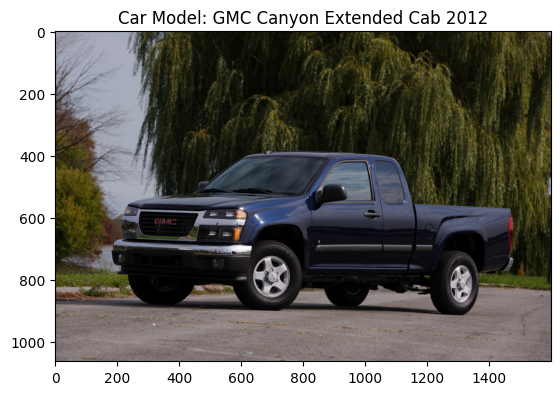

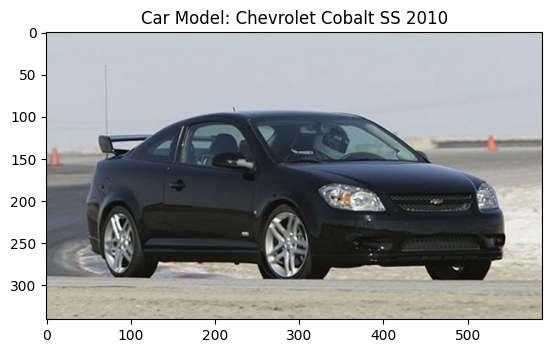

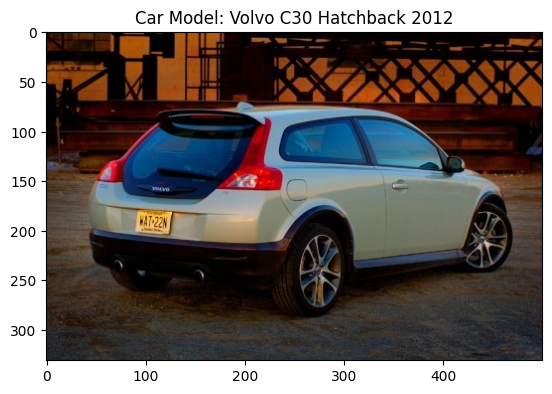

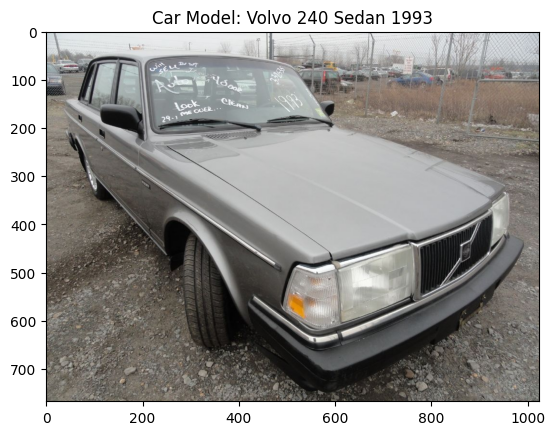

In [8]:
## showing some car images and their classes
for i in range(1,8001,2500):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [9]:

y_train = []
y_test = []

for i in range(len(train_car)):
    y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    y_test.append(get_test_car_class(test_car[i]))

In [10]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
# category_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 2, expand = True)
# df_train_labels["Category"]= category_extraction[1]
df_train_labels
# print(df_train_labels["Year"].unique())

,Cars,Make,Year
0,GMC Canyon Extended Cab 2012,GMC,2012
1,GMC Canyon Extended Cab 2012,GMC,2012
2,GMC Canyon Extended Cab 2012,GMC,2012
3,GMC Canyon Extended Cab 2012,GMC,2012
4,GMC Canyon Extended Cab 2012,GMC,2012
...,...,...,...
8139,BMW M3 Coupe 2012,BMW,2012
8140,BMW M3 Coupe 2012,BMW,2012
8141,BMW M3 Coupe 2012,BMW,2012
8142,BMW M3 Coupe 2012,BMW,2012


In [11]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]
df_test_labels

,Cars,Make,Year
0,GMC Canyon Extended Cab 2012,GMC,2012
1,GMC Canyon Extended Cab 2012,GMC,2012
2,GMC Canyon Extended Cab 2012,GMC,2012
3,GMC Canyon Extended Cab 2012,GMC,2012
4,GMC Canyon Extended Cab 2012,GMC,2012
...,...,...,...
8036,BMW M3 Coupe 2012,BMW,2012
8037,BMW M3 Coupe 2012,BMW,2012
8038,BMW M3 Coupe 2012,BMW,2012
8039,BMW M3 Coupe 2012,BMW,2012


In [12]:
## creating a list with car classes
model_names = list(df_test_labels["Cars"].unique())
model_names=sorted(model_names)
# print(model_names)
len(model_names)

196

In [13]:
model_data=pd.DataFrame(model_names,columns=['Name'])
print(model_data)

                               Name
0        AM General Hummer SUV 2000
1         Acura Integra Type R 2001
2               Acura RL Sedan 2012
3               Acura TL Sedan 2012
4              Acura TL Type-S 2008
..                              ...
191  Volkswagen Golf Hatchback 2012
192            Volvo 240 Sedan 1993
193        Volvo C30 Hatchback 2012
194             Volvo XC90 SUV 2007
195   smart fortwo Convertible 2012

[196 rows x 1 columns]


In [14]:
model_data.to_csv('modelnames.csv')

In [15]:
df_train_labels.to_csv(f'/kaggle/working/training_labels.csv')
df_test_labels.to_csv(f'/kaggle/working/testing_labels.csv')

**Creating barplots for Car's make and year of production**

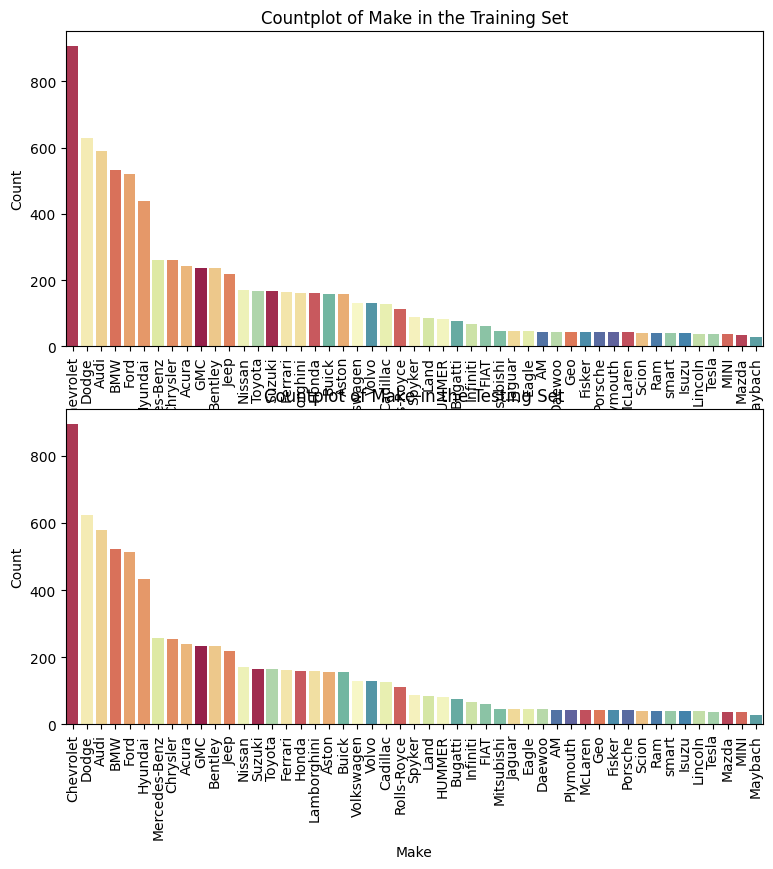

In [16]:

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 9))
plt.subplot(2, 1, 1)

sns.countplot(x=df_train_labels['Make'], data = df_train_labels, order = df_train_labels['Make'].value_counts().index, hue=df_train_labels['Make'],palette='Spectral')
plt.title('Countplot of Make in the Training Set')
plt.ylabel('Count')
plt.xticks(rotation = 90)

plt.subplot(2, 1, 2)
sns.countplot(x=df_test_labels['Make'], data = df_test_labels, order = df_test_labels['Make'].value_counts().index,hue=df_test_labels['Make'], palette = "Spectral")
plt.title('Countplot of Make in the Testing Set')
plt.ylabel('Count')
plt.xticks(rotation = 90)
# plt.tight_layout()
plt.show()

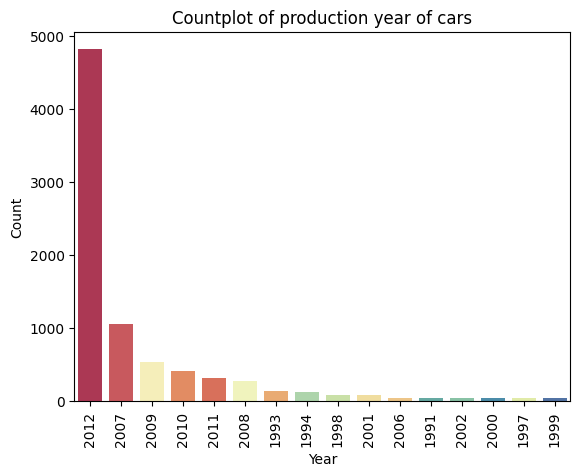

In [17]:
sns.countplot(x=df_train_labels['Year'], data = df_train_labels, order = df_train_labels['Year'].value_counts().index,hue=df_train_labels['Year'], palette = "Spectral")
plt.title('Countplot of production year of cars')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_train_labels = pd.read_csv('/kaggle/working/training_labels.csv')
df_test_labels = pd.read_csv('/kaggle/working/testing_labels.csv')

In [ ]:
print(len(df_train_labels))
print(len(df_test_labels))

8144
8041


## Deep Learning

To build the model, we decided to use Convolutional Neural Networks since they are known to be one of the most effective types of neural networks for image classification. Next, we will build different models to classify car dataset and then evaluate their performance

### Data pre-processing

Given that humans took images in our dataset, there is no specific angle or order on how pictures were taken. There is high variability in images in the dataset, and working with such a dataset can be tricky. To avoid such problems, we performed data augmentation, which is a technique that increases the diversity of the dataset by applying random transformations. Also, for all images, we selected the standard size of 224x224x3.

In [ ]:
## setting up some parameters for data augmentation
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)
## different models car
n_classes = len(model_names)
batch_size = 32

In [ ]:
print(n_classes)
print(train_samples)
print(validation_samples)

196
8144
8041


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
## performing augmentation on the training data
train_datagen = ImageDataGenerator( rescale=1. / 255,
                                   zoom_range=0.2,
                                    rotation_range = 5,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
## getting the path to the data

train_path = "/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/train"
test_path = "/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data/test"

In [ ]:
print(test_datagen)

In [ ]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(img_width, img_height),
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                   )
validation_generator = test_datagen.flow_from_directory(test_path,
                                                        target_size=(img_width, img_height),
                                                         batch_size=batch_size,
                                                         class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


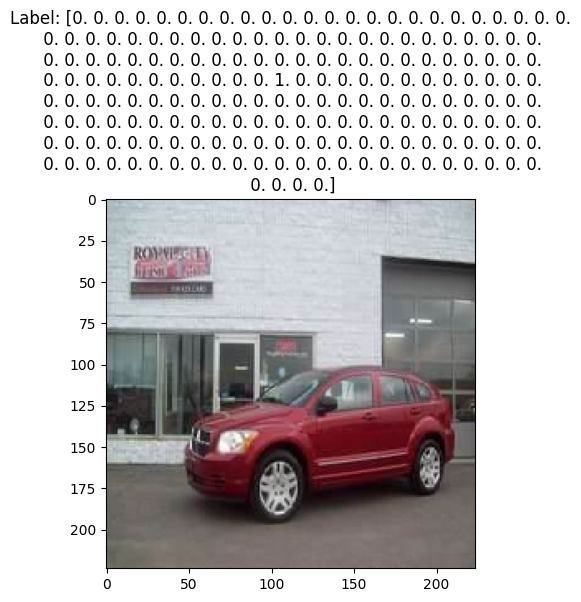

Dodge Caliber Wagon 2012


In [ ]:
import matplotlib.pyplot as plt

# Assuming train_generator is already defined
X, Y = validation_generator.next()

# Plot the first image in the batch
plt.imshow(X[0])
plt.title("Label: {}".format(Y[0]))
plt.show()
print(model_names[np.argmax(Y[0])])
# print(model_names)

In [ ]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Transfer Learning
Transfer learning is a process where you take an existing trained model. In this project, we used three different models two pre-trained model: MobileNet V2 and EfficientNet B1 and other by Building CNN layer.

### Mobile Net V2
MobileNet-v2 is a convolutional neural network that contains 53 layers. This network has been trained on more than a million images from the ImageNet database and it can classify objects into more than a 1000 categories. This CNN has been optimized to perform well on mobile devices.

In [ ]:
## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False ## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu',
          kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)
x = BatchNormalization()(x)
output = Dense(units=196, activation='softmax')(x) ## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
## compile the model, define optimizer and the loss function
model_1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [ ]:
# model_1.summary()

In [ ]:
## train the model
history_1 = model_1.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator),
                        epochs=20,
                       callbacks=[early_stopping])

Epoch 1/20


I0000 00:00:1707986809.351627     120 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


255/255 [==============================] - 240s 910ms/step - loss: 10.8559 - accuracy: 0.1682 - val_loss: 7.0862 - val_accuracy: 0.2633
Epoch 2/20
255/255 [==============================] - 149s 585ms/step - loss: 5.4572 - accuracy: 0.3847 - val_loss: 5.6658 - val_accuracy: 0.2768
Epoch 3/20
255/255 [==============================] - 148s 580ms/step - loss: 4.4632 - accuracy: 0.4402 - val_loss: 5.2854 - val_accuracy: 0.3100
Epoch 4/20
255/255 [==============================] - 149s 585ms/step - loss: 4.2198 - accuracy: 0.4601 - val_loss: 5.3531 - val_accuracy: 0.3013
Epoch 5/20
255/255 [==============================] - 148s 580ms/step - loss: 4.1229 - accuracy: 0.4828 - val_loss: 5.3970 - val_accuracy: 0.3084
Epoch 6/20
255/255 [==============================] - 148s 581ms/step - loss: 4.0655 - accuracy: 0.4860 - val_loss: 5.2406 - val_accuracy: 0.3221
Epoch 7/20
255/255 [==============================] - 153s 598ms/step - loss: 3.9830 - accuracy: 0.5043 - val_loss: 5.3239 - val_accur

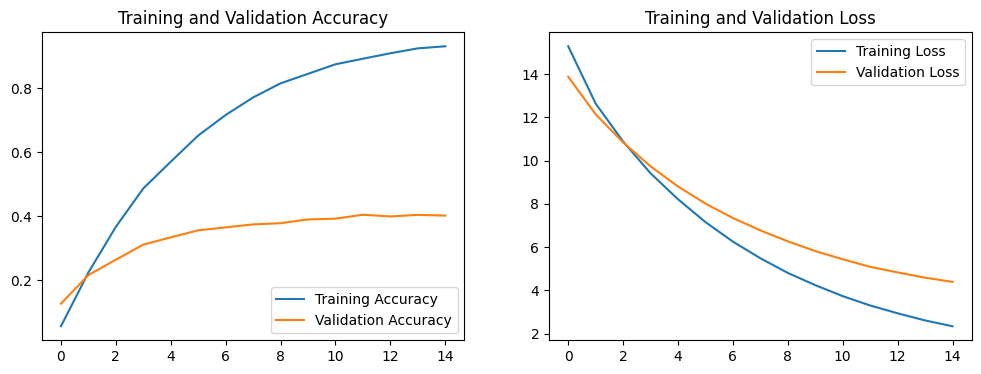

In [ ]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']
loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']
epochs_range = range(15)
plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_1.save('mobilenet_3.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## EfficientNet B1

EfficientNet is among the most efficient models Also, this network has been pre-trained on the ImageNet database, but it is considered to be one the most efficient models. In comparsion with other CNNs, EfficientNet use a method called compound scaling, which uniformly scales all dimensions of depth/width/resolution while maintaingn the balance (ref). That reduces significantly the the dimensions of the classification problems.

In [ ]:
## loading the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(196, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False



In [ ]:
## compile model, define optimizer and the loss function
model_2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
#  model_2.summary()


In [ ]:
## train the model
history_2 = model_2.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        validation_steps=len(validation_generator),
                        epochs=20,
                        callbacks=[early_stopping])

Epoch 1/20


2024-02-15 09:44:25.714555: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


255/255 [==============================] - 181s 612ms/step - loss: 3.8273 - accuracy: 0.1999 - val_loss: 7.5006 - val_accuracy: 0.0053
Epoch 2/20
255/255 [==============================] - 157s 615ms/step - loss: 1.4064 - accuracy: 0.6256 - val_loss: 8.0466 - val_accuracy: 0.0050
Epoch 3/20
255/255 [==============================] - 155s 608ms/step - loss: 0.7350 - accuracy: 0.7908 - val_loss: 10.0569 - val_accuracy: 0.0061
Epoch 4/20
255/255 [==============================] - 155s 606ms/step - loss: 0.4635 - accuracy: 0.8659 - val_loss: 6.7958 - val_accuracy: 0.1199
Epoch 5/20
255/255 [==============================] - 154s 605ms/step - loss: 0.3405 - accuracy: 0.9008 - val_loss: 3.0991 - val_accuracy: 0.4114
Epoch 6/20
255/255 [==============================] - 157s 613ms/step - loss: 0.2783 - accuracy: 0.9206 - val_loss: 9.8668 - val_accuracy: 0.0172
Epoch 7/20
255/255 [==============================] - 155s 608ms/step - loss: 0.2557 - accuracy: 0.9252 - val_loss: 4.5116 - val_accur

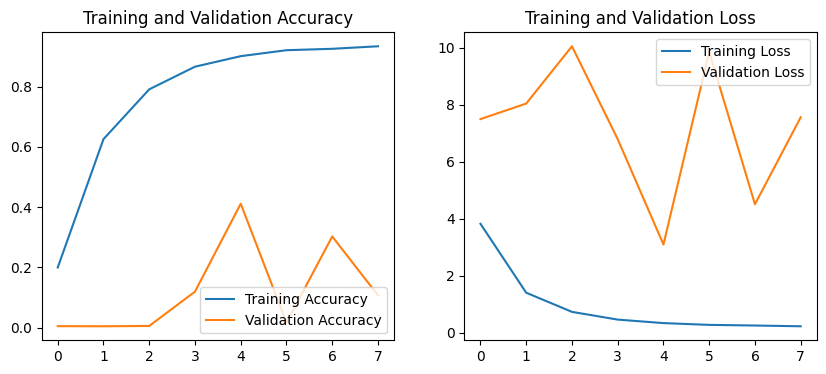

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
epochs_range = range(8)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_2.save('effb1_model10.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# modelm = Sequential()
# modelm.add((Conv2D(64,(5,5),input_shape=(224,224,3),activation='relu')))
# # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
# modelm.add((Conv2D(64, (5,5), activation='relu')))
# modelm.add(MaxPooling2D(pool_size=(2,2)))
# modelm.add(Dropout(0.1))
# modelm.add((Conv2D(32, (3,3),activation='relu')))
# modelm.add((Conv2D(32, (3,3), activation='relu')))
# modelm.add(MaxPooling2D(pool_size=(2,2)))
# modelm.add(Dropout(0.1))
# modelm.add(Flatten())
# modelm.add(Dense(500,activation='relu'))
# modelm.add(Dropout(0.1))
# modelm.add(Dense(200,activation='relu'))
# modelm.add(Dropout(0.1))
# modelm.add(Dense(len(model_names),activation='softmax'))
# modelm.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
# ## train the model
# history_4 = modelm.fit(train_generator,
#                         steps_per_epoch=len(train_generator),
#                         validation_data=validation_generator,
#                         validation_steps=len(validation_generator),
#                         epochs=20,
#                         callbacks=[early_stopping])

Epoch 1/20


2024-02-10 17:11:10.886905: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


255/255 [==============================] - 226s 830ms/step - loss: 17.2498 - accuracy: 0.0066 - val_loss: 5.2734 - val_accuracy: 0.0085
Epoch 2/20
255/255 [==============================] - 201s 790ms/step - loss: 5.2831 - accuracy: 0.0083 - val_loss: 5.2730 - val_accuracy: 0.0085
Epoch 3/20
255/255 [==============================] - 200s 782ms/step - loss: 5.2828 - accuracy: 0.0083 - val_loss: 5.2730 - val_accuracy: 0.0085
Epoch 4/20
255/255 [==============================] - 202s 793ms/step - loss: 5.2832 - accuracy: 0.0083 - val_loss: 5.2728 - val_accuracy: 0.0085


## Model predictions
This function selects images from the testing datasets, inputs them in the model that we created and returns the perdiction about what car is in the image. Also, it plots the image of the car, so someone can see if the prediction is true or false.

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0,3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' + 'predicted: ' + predicted + ' with probability of: ' + str(val_pred)[:4])
        plt.imshow(image)

1/1 [==============================] - 0s 40ms/step


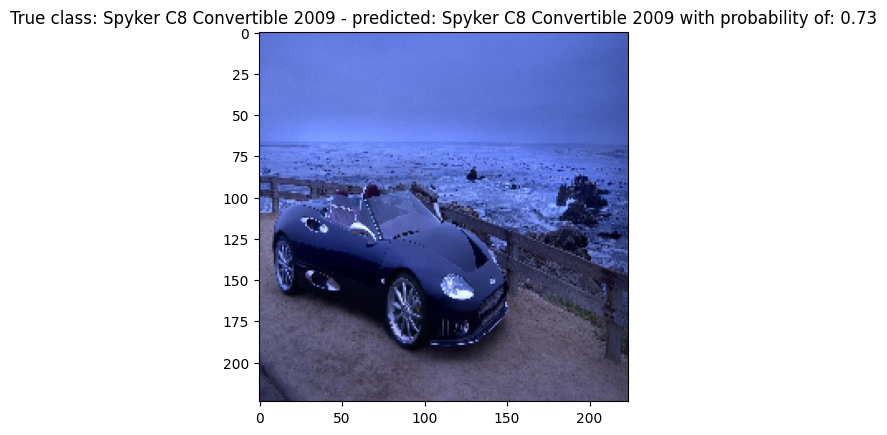

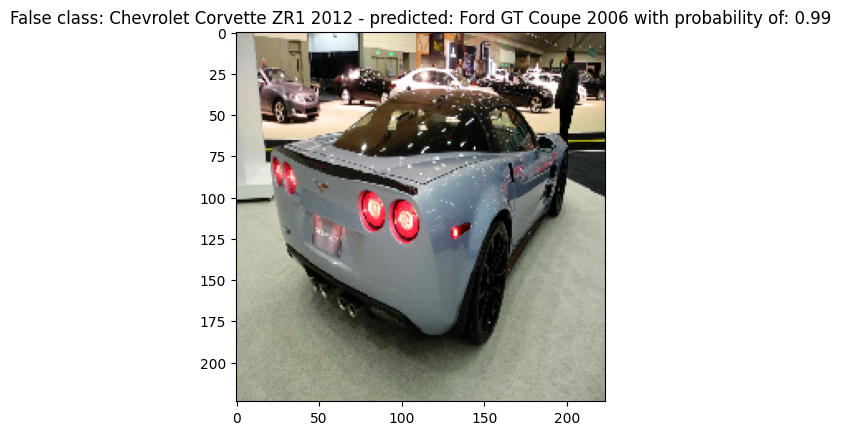

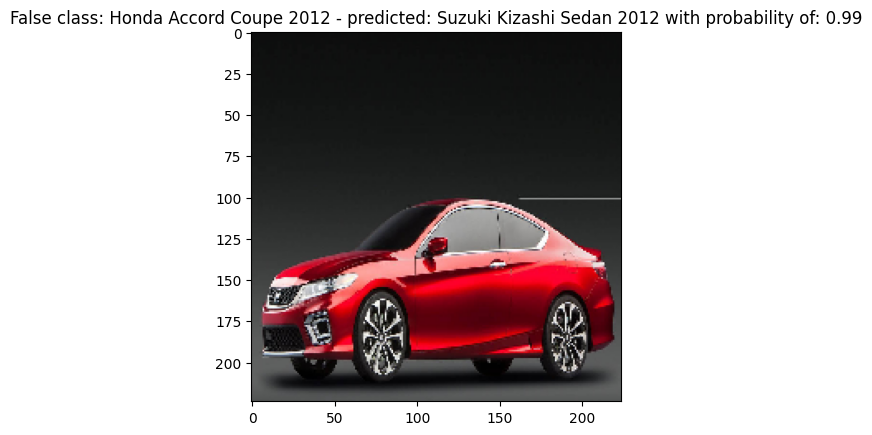

In [ ]:
## making prediction about different car models
predict_class(model_2)

1/1 [==============================] - 0s 36ms/step


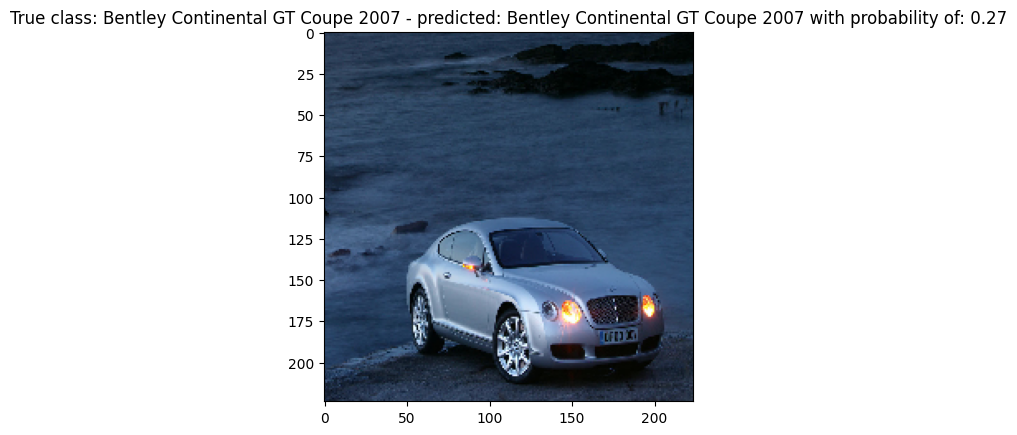

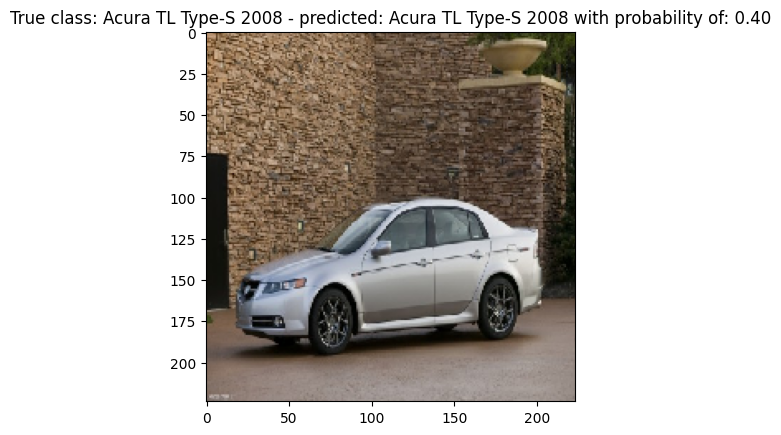

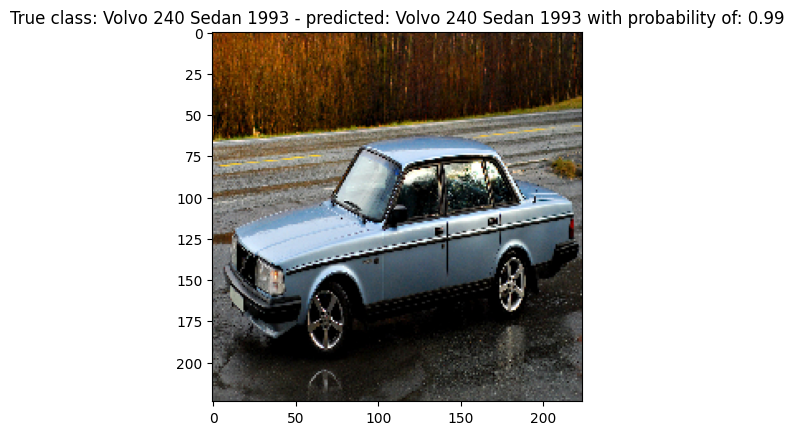

In [ ]:
predict_class(model_1)